# Выбор локации для скважины

Для добывающей компании «ГлавРосГосНефть». Необходимо выявить регион с наиболее прибыльными месторождениями.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски.

**Шаги для выбора локации:**

- В избранном регионе найти месторождения, для каждого определить значения признаков;
- Построить модель и оценить объём запасов;
- Выбирать месторождения с самым высокими оценками значений. Количество месторождений 200 скважин бюджет компании 10 млрд.руб.;
- Прибыль будет равна суммарной прибыли отобранных месторождений.

# Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data_0 = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Моя новая профессия/Проекты/Выбор локации для скважины/geo_data_0.csv')
data_1 = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Моя новая профессия/Проекты/Выбор локации для скважины/geo_data_1.csv')
data_2 = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Моя новая профессия/Проекты/Выбор локации для скважины/geo_data_2.csv')

Таблица



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Дубликаты


0


Разброс данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Гистограммы


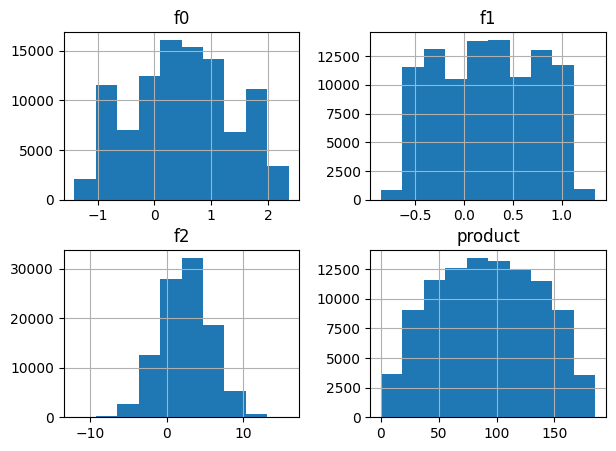

Таблица



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Дубликаты


0


Разброс данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Гистограммы


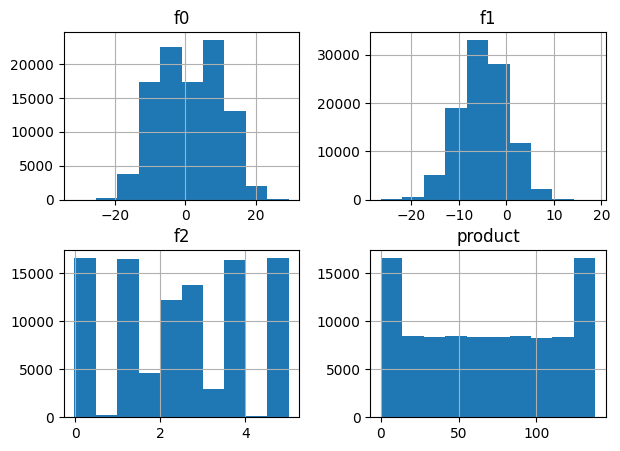

Таблица



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Дубликаты


0


Разброс данных


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



Гистограммы


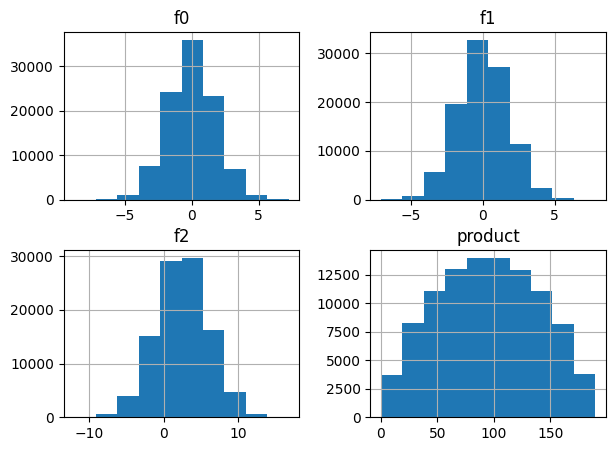

In [3]:
data = [data_0, data_1, data_2]
for i in data:
    print('Таблица')
    print()
    display(i.head())
    print()
    print('Информация о таблице')
    print(i.info())
    print()
    print('Дубликаты')
    display(i.duplicated().sum())
    print()
    print('Разброс данных')
    display(i.describe())
    print()
    print('Гистограммы')
    i.hist(figsize=(7,5))
    plt.show()

**Проверка id на дубликаты**

In [4]:
print(data_0['id'].duplicated().sum())
print(data_1['id'].duplicated().sum())
print(data_2['id'].duplicated().sum())

10
4
4


**Удаление дубликатов id**

In [5]:
data_0 = data_0.drop_duplicates(['id']).reset_index(drop=True)
data_1 = data_1.drop_duplicates(['id']).reset_index(drop=True)
data_2 = data_2.drop_duplicates(['id']).reset_index(drop=True)

In [6]:
print(data_0['id'].duplicated().sum())
print(data_1['id'].duplicated().sum())
print(data_2['id'].duplicated().sum())

0
0
0


**Столбец id удаляем** за ненадобностью

**Проверка data_1 на выбросы и дубликаты**

In [7]:
data_1['product'].sort_values(ascending=False).value_counts()

53.906522     8472
26.953261     8468
84.038886     8430
57.085625     8389
3.179103      8337
80.859783     8320
30.132364     8306
110.992147    8303
134.766305    8303
0.000000      8235
137.945408    8233
107.813044    8200
Name: product, dtype: int64

In [8]:
data_1['f2'].duplicated().sum()

0

In [9]:
data_1['f2'].value_counts().sort_values(ascending=False)

3.996243    1
0.001432    1
2.009050    1
1.003986    1
1.004504    1
           ..
3.004506    1
5.002315    1
4.008079    1
1.991458    1
4.992682    1
Name: f2, Length: 99996, dtype: int64

In [10]:
data_1.pivot_table(index='f0', values='f1', aggfunc='count').sort_values(by='f1', ascending=False)

,f1
f0,
-31.609576,1
6.493946,1
6.499142,1
6.498912,1
6.498774,1
...,...
-4.250678,1
-4.250823,1
-4.250840,1


В таблице data_1 были дубликаты в столбце id, удалили.
Также есть дубликаты в product. Однако по остальным столбцам дубликатов нет. Поэтому будем считать данные верными.

In [11]:
data_2['product'].value_counts().sort_values(ascending=False)

0.000000      1
123.818275    1
44.968612     1
29.949892     1
109.071637    1
             ..
7.017207      1
93.003728     1
55.819558     1
63.978856     1
49.640390     1
Name: product, Length: 99996, dtype: int64

In [12]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

In [13]:
def corr (data):
    product = data['product']
    f0 = data['f0']
    f1 = data['f1']
    f2 = data['f2']
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig.suptitle('Корреляция')
    ax1.scatter(product, f0)
    ax1.set_xlabel('Кол-во продукта')
    ax1.set_ylabel('F0')
    ax2.scatter(product, f1)
    ax2.set_xlabel('Кол-во продукта')
    ax2.set_ylabel('F1')
    ax3.scatter(product, f2)
    ax3.set_xlabel('Кол-во продукта')
    ax3.set_ylabel('F2')
    print('Корреляция кол-ва продукта c f0', data['f0'].corr(data['product']))
    print('Корреляция кол-ва продукта c f1', data['f1'].corr(data['product']))
    print('Корреляция кол-ва продукта c f2', data['f2'].corr(data['product']))

Корреляция кол-ва продукта c f0 0.14350354470629628
Корреляция кол-ва продукта c f1 -0.19235060940995086
Корреляция кол-ва продукта c f2 0.48363098276108935


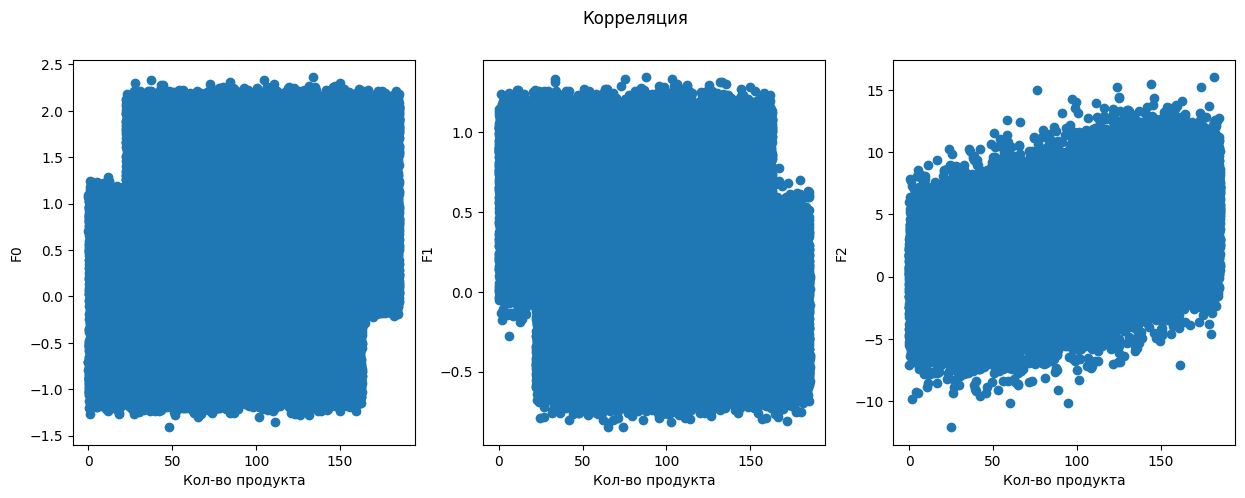

In [14]:
corr(data_0)

Корреляция кол-ва продукта c f0 -0.030522920755862017
Корреляция кол-ва продукта c f1 -0.010153692790654685
Корреляция кол-ва продукта c f2 0.9993969736591202


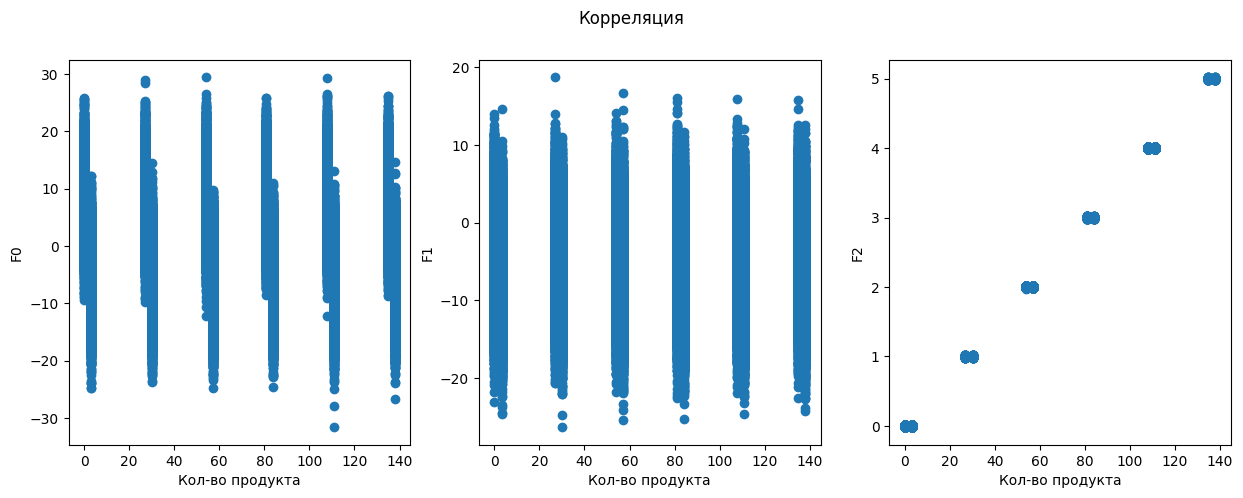

In [15]:
corr(data_1)

Корреляция кол-ва продукта c f0 -0.0019776582424404945
Корреляция кол-ва продукта c f1 -0.0010545826382116219
Корреляция кол-ва продукта c f2 0.4458669943489581


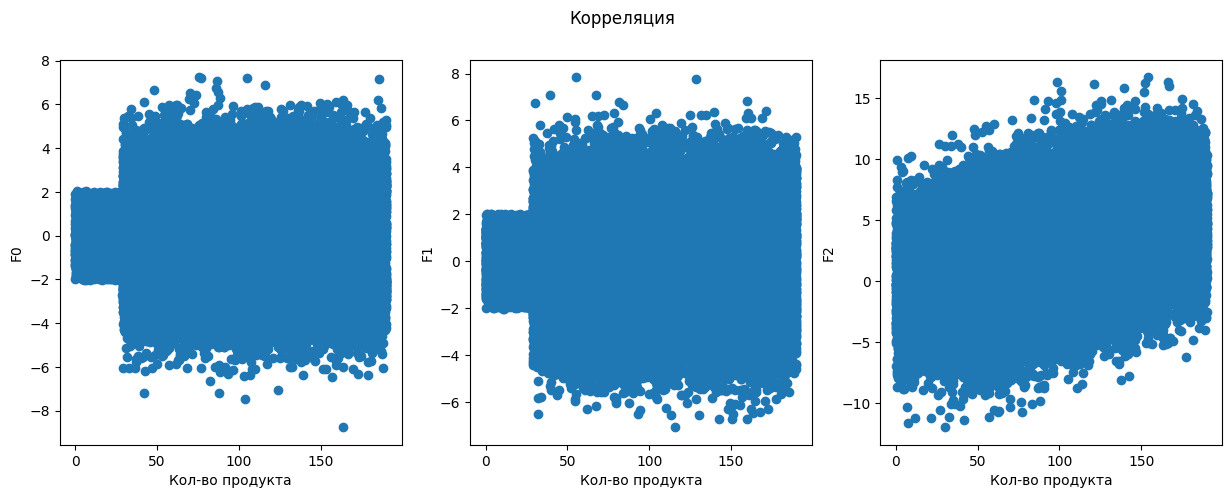

In [16]:
corr(data_2)

### Вывод
**Целевой признак** product

**Признаки** f0, f1, f2

Удалили дубликаты

Столбец id удален за ненадобностью

Как мы видим на целевой признак во всех трех регионах имеет признак F2.

# Обучение и проверка модели

## Разделение на выборки


In [17]:
features_0 = data_0.drop(['product'], axis=1)
target_0 = data_0['product']
ft_0, fv_0, tt_0, tv_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=12345)
print(ft_0.shape, fv_0.shape, tt_0.shape, tv_0.shape)

features_1 = data_1.drop(['product'], axis=1)
target_1 = data_1['product']
ft_1, fv_1, tt_1, tv_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)
print(ft_1.shape, fv_1.shape, tt_1.shape, tv_1.shape)

features_2 = data_2.drop(['product'], axis=1)
target_2 = data_2['product']
ft_2, fv_2, tt_2, tv_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)
print(ft_2.shape, fv_2.shape, tt_2.shape, tv_2.shape)

(74992, 3) (24998, 3) (74992,) (24998,)
(74997, 3) (24999, 3) (74997,) (24999,)
(74997, 3) (24999, 3) (74997,) (24999,)


## Обучание на линейной регрессии

In [18]:
model_0 = LinearRegression()
model_0.fit(ft_0, tt_0)
predictions_0 = model_0.predict(fv_0)
rmse_0 = mean_squared_error(tv_0, predictions_0) ** 0.5
print(f'Средний запас предсказанного сырья: {predictions_0.mean():.2f};  RMSE: {rmse_0:.2f}')

model_1 = LinearRegression()
model_1.fit(ft_1, tt_1)
predictions_1 = model_1.predict(fv_1)
rmse_1 = mean_squared_error(tv_1, predictions_1) ** 0.5
print(f'Средний запас предсказанного сырья: {predictions_1.mean():.2f};  RMSE: {rmse_1:.2f}')

model_2 = LinearRegression()
model_2.fit(ft_2, tt_2)
predictions_2 = model_2.predict(fv_2)
rmse_2 = mean_squared_error(tv_2, predictions_2) ** 0.5
print(f'Средний запас предсказанного сырья: {predictions_2.mean():.2f};  RMSE: {rmse_2:.2f}')

Средний запас предсказанного сырья: 92.79;  RMSE: 37.85
Средний запас предсказанного сырья: 69.18;  RMSE: 0.89
Средний запас предсказанного сырья: 94.87;  RMSE: 40.08


### Вывод
Лучшие показатели у региона 0 и региона 2. Регион 1 имеет худший результат.

# Подготовка к расчёту прибыли

## Константы для расчетов

In [19]:
BARR_PRICE = 450_000
BUDGET = 10_000_000_000
LOT_OIL_WELL = 200
RESEARCH_LOT_OIL_WELL = 500

predicted_0 = pd.Series(predictions_0, index = tv_0.index)

predicted_1 = pd.Series(predictions_1, index = tv_1.index)

predicted_2 = pd.Series(predictions_2, index = tv_2.index)


In [20]:
predicted_0.head()

49466    103.950372
55493     73.687869
11689    101.015288
13769     94.048415
72389     87.559552
dtype: float64

## Расчет минимального кол-ва единиц баррелей

In [21]:
minimal_barr = (2 * BUDGET - BUDGET) / BARR_PRICE / LOT_OIL_WELL
print(f'Минимальное кол-во: {minimal_barr:.2f} ед.барр.')


Минимальное кол-во: 111.11 ед.барр.


Минимальное количество продукта необходимого для безубыточной разработки 111 ед. баррелей.

Стоит отметить что средние запасы по регионам ниже особенно в Регионе 1.

## Функция для расчета прибыли

In [22]:
def profit(predicted, target, count):
    predicted = predicted.sort_values(ascending=False)
    top_oil = predicted[:count]
    target = target.sort_values(ascending=False)
    target = pd.Series(target, index=top_oil.index)
    sum_target = sum(target) * BARR_PRICE
    return sum_target - BUDGET
    
print(f'Прибыль в регионе 0: {profit(predicted_0, tv_0, LOT_OIL_WELL):_.0f} руб.')
print(f'Прибыль в регионе 1: {profit(predicted_1, tv_1, LOT_OIL_WELL):_.0f} руб.')    
print(f'Прибыль в регионе 2: {profit(predicted_2, tv_2, LOT_OIL_WELL):_.0f} руб.')    

Прибыль в регионе 0: 3_365_187_238 руб.
Прибыль в регионе 1: 2_415_086_697 руб.
Прибыль в регионе 2: 2_501_283_853 руб.


# Расчёт прибыли и рисков 

## Функция для расчета прибыли и рисков

In [25]:
def bootstrap (predicted, target):
    values = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        subsample = predicted.sample(RESEARCH_LOT_OIL_WELL, replace=True, random_state=state)
        values.append(profit(subsample, target, LOT_OIL_WELL))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    (print(f'Средняя прибыль по региону: {values.mean():_.0f} руб.'),
     print(f'Доверительный интервал: {lower:_.0f} руб. - {upper:_.0f} руб.'),
     print(f'Процент риска: {(values < 0).mean():.2%}'))
    plt.title('График прибыли')
    plt.grid()
    plt.hist(values, label='Прибыль')
    plt.axvline(lower, color = 'r', label = 'Нижняя граница')
    plt.axvline(upper, color = 'b', label = 'Верхняя граница')
    plt.legend()
    plt.show()

## Расчеты

Регион 0
Средняя прибыль по региону: 380_613_470 руб.
Доверительный интервал: -142_942_740 руб. - 890_976_834 руб.
Процент риска: 7.70%


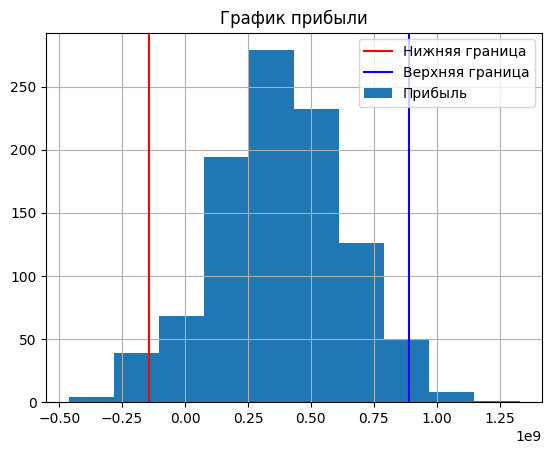

None
Регион 1
Средняя прибыль по региону: 478_484_940 руб.
Доверительный интервал: 89_525_125 руб. - 866_604_745 руб.
Процент риска: 1.20%


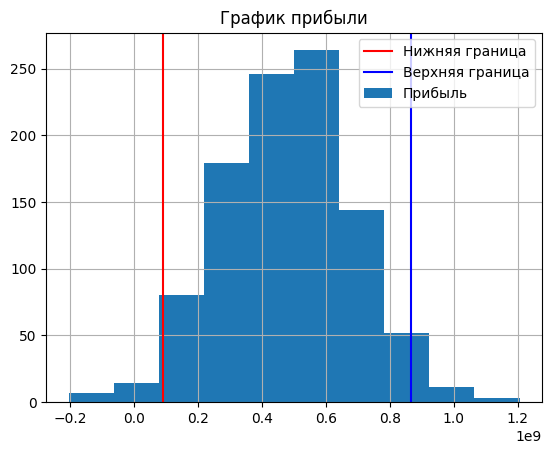

None
Регион 2
Средняя прибыль по региону: 330_546_258 руб.
Доверительный интервал: -190_365_734 руб. - 840_467_404 руб.
Процент риска: 11.30%


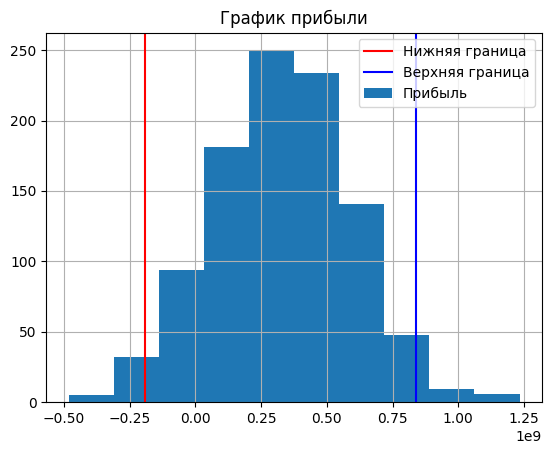

None


In [26]:
print('Регион 0')
print(bootstrap(predicted_0, tv_0))
print('Регион 1')
print(bootstrap(predicted_1, tv_1))
print('Регион 2')
print(bootstrap(predicted_2, tv_2))

# Вывод

Сделан анализ и предобработка данных для корректной работы модели предсказаний.

Выявлено значительное влияние на предсказание выработки продукта признак ***F2***.

Минимальное кол-во ед.баррелей необходимых для прибыльности ***111,11 ед.барр.***

По итогам предсказаний выяснили следующее:

***Средний объем запасов по регионам:***
- Регион 0: ***92.79***
- Регион 1: ***69.18***
- Регион 2: ***94.87***

***Средняя прибыль по регионам и процент риска:***

- Регион 0: ***380_613_470 руб.;  7.70%***
- Регион 1: ***478_484_940 руб.;  1.20%***
- Регион 2: ***330_546_258 руб.;  11.30%***


Минимальное кол-во ед.баррелей необходимых для прибыльности ***111,11 ед.барр.***

***С учетом высоких рисков на других регионах в разработку лучше брать Регион 1.***